In [1]:
# HOG
# -1 0 1
# -2 0 2
# -1 0 1 - gradient pt contur vertical

# calcul magnitude pentru fiecare pixel
# mg = sqrt(Gh^2 + Gv^2)

# calcul orientare 
# o = atan(Gv/Gh)
# bins = 9 (de la 0 la 360 grade)
# o = 30, 60, 90, 120, 150, 180, 210, 240, 270 exemplu 
# mg < t -> anulam orientarile de pe pozitia i

In [9]:
import numpy as np
from skimage import io,color
import matplotlib.pyplot as plt
import math
import pdb
import scipy.signal as sig
import os

In [21]:
def eucdist(vec1, vec2):
    
    #PARAMETERS: cei 2 vectori
    #RETURN: distanta
    
    vec1 = np.array(vec1)
    vec2 = np.array(vec2)
    return np.linalg.norm(vec1 - vec2)

In [34]:
def hog(imagine, tip_nucleu, threshhold):

    #PARAMTERS: imagine,tip_nucleu, threshhold
    #RETURN: GV,GH,histograma gradientilor orientati
    h,w = np.shape(imagine)
    
    # calculul gradientilor Gh si GV in functie de fiecare nucleu
    if(tip_nucleu ==1):
        Gh = -imagine[0:h-2,:]+ imagine[2:h,:]
        Gv = -imagine[:,0:w-2] + imagine[:,2:w]
        
    if(tip_nucleu ==2):
        Gh = -imagine[0:h-1,:]+imagine[1:h,:]
        Gv = -imagine[:,0:w-1] + imagine[:,1:w] 
     
    if(tip_nucleu ==3):
        Gh = -imagine[0:h-2,0:w-2] + imagine[2:h,0:w-2] -2*imagine[0:h-2,1:w-1] + 2*imagine[2:h,1:w-1] - imagine[0:h-2,2:w] + imagine[2:h,2:w] 
        Gv = -imagine[0:h-2,0:w-2] + imagine[0:h-2,2:w] -2*imagine[1:h-1,0:w-2] + 2*imagine[1:h-1,2:w] - imagine[2:h,0:w-2] + imagine[2:h,2:w]
     
    # calcul magnitudine si orientare folosind Gh si Gv
    # puteti folosi math.sqrt si math.atan
    # daca folositi math.atan trebuie sa treceti din [-pi/2,i/2] in [0,pi]
    Mg = np.sqrt(Gh**2 + Gv**2)
    O = np.arctan2(Gv, Gh+0.00001) * 180 / np.pi
    
    #vectorizare magnitudine si gradienti\
    Mg = Mg.flatten()
    O = O.flatten()

    #anularea orientarilor pentru care magnitudinea este mai mica ca pragul ales
    # altfel spus vreau sa raman in vectorul de orientari doar cu pozitile valorilor
    # pentru care magnitudinea este mai mica decat T
    Mg[Mg < threshhold] = 2000
    O = O[O != 2000]

    #calculez histograma de orientari pt 9 bins cu np.histogram
    histograma, bin_edges = np.histogram(O, bins=9)
    # print(histograma)

    #normez histograma la suma elementelor si adun si un epsilon ca sa
    #evit situatia in care impart la 0 (blocul contine o regiune uniforma)
    histograma = histograma / (np.sum(histograma) + 1e-5)
  
    return Gh,Gv, histograma

[[ True  True]
 [ True  True]] [[ True  True]
 [ True  True]]


(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1acdf0cca10>)

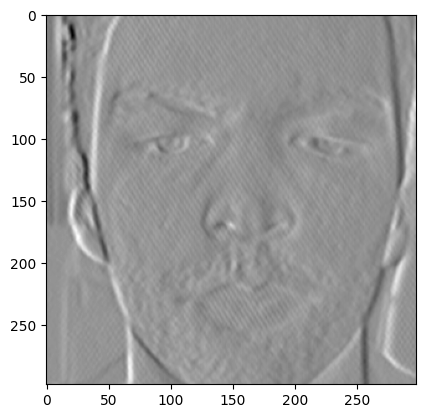

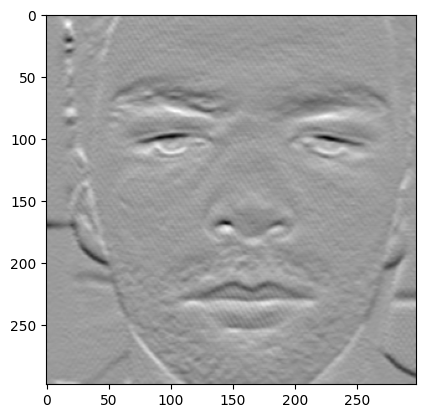

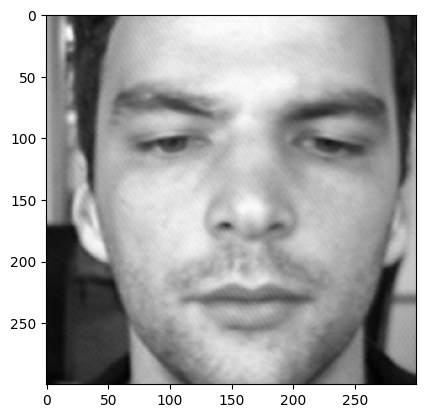

In [38]:
#citesc o imagine     
im=io.imread('Mari/BioID_F1_1.jpg')
#transf in gray
im = color.rgb2gray(im)

#verificare pt Sobel 
a=np.array([[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,1,1,1]])
gv=np.array([[8,8],[6,6]])
gh=np.array([[ 0,0],[-4,-8]])
Gh,Gv,img_hog=hog(a, 3, 0.85)
print(gv==Gv,gh==Gh)

#calculez gradientii pe nert si horiz si dupa HOG
Gv,Gh,img_hog=hog(im, 3, 0.85)

#plotez cum arata Gh si Gv
plt.figure(),plt.imshow(Gh ,cmap='gray')
plt.figure(),plt.imshow(Gv ,cmap='gray')
plt.figure(),plt.imshow(im ,cmap='gray')

[[ 0  1  2 11 10  9  7  6  8  3  4  5]
 [ 1  2  0 11  6  7  9 10  8  3  5  4]
 [ 2  1  0 11  9 10  6  7  8  3  5  4]
 [ 3  5  4  2  9  1 10  7 11  6  0  8]
 [ 4  3  5 10  7  6  9  8  2 11  1  0]
 [ 5  3  4  9 10 11  7  6  8  2  1  0]
 [ 6  7  8 11  9 10  2  1  0  5  3  4]
 [ 7  6  8 11  9 10  2  1  0  5  3  4]
 [ 8  7  6  9 11 10  2  1  0  5  3  4]
 [ 9 10 11  6  7  8  2  1  0  5  3  4]
 [10  9 11  6  7  8  2  0  1  5  3  4]
 [11  9 10  6  7  8  2  1  0  5  3  4]]
[[ 0  1  2 11 10  9  7  6  8  3  4  5]
 [ 1  2  0 11  6  7  9 10  8  3  5  4]
 [ 2  1  0 11  9 10  6  7  8  3  5  4]
 [ 3  5  4  2  9  1 10  7 11  6  0  8]
 [ 4  3  5 10  7  6  9  8  2 11  1  0]
 [ 5  3  4  9 10 11  7  6  8  2  1  0]
 [ 6  7  8 11  9 10  2  1  0  5  3  4]
 [ 7  6  8 11  9 10  2  1  0  5  3  4]
 [ 8  7  6  9 11 10  2  1  0  5  3  4]
 [ 9 10 11  6  7  8  2  1  0  5  3  4]
 [10  9 11  6  7  8  2  0  1  5  3  4]
 [11  9 10  6  7  8  2  1  0  5  3  4]]
Nr de fete metoda 1 este  24
Nr de fete metoda 2 este  12
[[0.

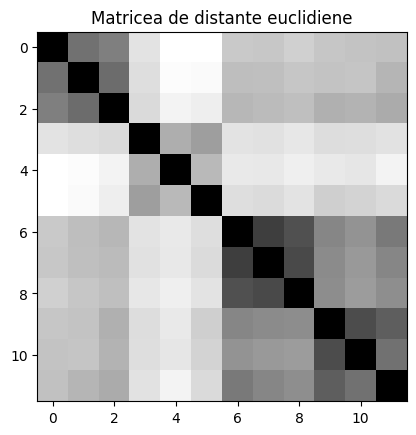

In [41]:
mask=np.array([[2,1,1,1,1,1,2],
    [2,4,4,1,4,4,2],
    [1,1,1,0,1,1,1],
    [0,1,1,0,1,1,0],
    [0,1,1,1,1,1,0],
    [0,1,1,2,1,1,0],
    [0,1,1,1,1,1,0]])

lista_poze = os.listdir('Mari')
#parcurge pozele rand pe rand
#citeste,tranf in gray
nr_imagini = len(lista_poze)
#initializarea matricii de descriptori
descriptori_hog=np.zeros((nr_imagini, 49 * 9)) # in rest ca la lbp mainul

for k, poza in enumerate(lista_poze):
    im=io.imread(os.path.join('Mari',poza))
    #plt.figure(), plt.imshow(im), plt.show()
    im=color.rgb2gray(im)
#initializez lista in care calculez descritorii
#calculez pasul pt impartirea in 7x7 ferestre
    lista_histograma_fereastra=[]
    H,W=np.shape(im)
    step=H//7
    for i in range(0,H-step,step):
        for j in range(0,W-step,step):
    #parcurg imaginea pe blocuri(7x7)
    
            #decupez fiecare ferastra din cele 49
            fereastra=im[i:i+step, j:j+step]
            
            #calculez histograma ferestrei curente si o inmultesc cu masca
            #folositi np.histogram 256 de bins
            hist_hog = hog(fereastra,3,0.05)[2]
            hist_norm = hist_hog*mask[i//step,j//step]
            
            # hist_hog=np.histogram(fereastra,bins=256,range=(0,256))[0]*mask[i//step, j//step]

            #pun histograma in lista
            lista_histograma_fereastra.append(hist_hog)
    
    #transform lista de histograme in array
    
    #pun hostogramele concatenate pe linia corespunzatoare imaginii in
    #descriptori_lbp, cel mai simplu este sa folositi flatten() decat 
    #functii de concatenare propriu zise      
    rez=np.array(lista_histograma_fereastra)
    descriptori_hog[k,:]=rez.flatten()

#initializez matrica de distante    
distante=np.zeros([12,12])

#calculez dist euclidiana intre toti descritorii asociati imaginilor
#inclusiv intre aceeasi descriptori
#treb sa obtin o mat care are pe diag principala 0
for i in range(nr_imagini):
    for j in range(nr_imagini):
        distante[i, j] = eucdist(descriptori_hog[i], descriptori_hog[j])

nr_fete=0
plt.imshow(distante, cmap="gray")
plt.title('Matricea de distante euclidiene')
#vreau sa calculez cate fete imi recunoaste
#logica=> intre descritorii asociati pozelor care tin de aceeasi persoana
#ar trebui sa am distentele cele mai mici
#folosind matricea de distante treb sa scriu un cod care calculeaza
#cate fete imi recunoaste

#HINT: np.sort(),np.argsort()

sorted_indices = np.argsort(distante, axis=1)
print(sorted_indices)
corect = 0

for i in range(nr_imagini):
    cei_mai_apropiati = sorted_indices[i,1:3]
    clase_corecte = i//3
    clase_vecini = cei_mai_apropiati//3
    corect += np.sum(clase_vecini == clase_corecte)

indici_sortati = np.argsort(distante, axis=1)
print(indici_sortati)
nr_fete = 0
for i in range(nr_imagini):
    cei_mai_apropiati = indici_sortati[i, 1:3]
    clase_corecte = i // 3
    clase_vecini = cei_mai_apropiati // 3
    if all(clase_corecte == clase_vecini):
    	nr_fete += 1

print('Nr de fete metoda 1 este ', corect )
print('Nr de fete metoda 2 este ', nr_fete )

#stim ca in folder avem cate 3 poze pt fiecare poza, ordonate: 3xP1, 3xP2, 3xP3, 3xP4
# => pt poza P1 vrem sa obtinem indicii 0,1,2 (coresp primelor 3 imagini din folder)
#sortam primele 3 coloane pt a obtine mereu indicii in ord 
calc_fete = np.sort(distante[:,:3])
print(calc_fete)
posibile = ['012','345','678','91011']

for i in range(calc_fete.shape[0]):
    string = ''
    for j in range(3):
        string+= str(calc_fete[i,j])
    if string in posibile:
        nr_fete += 1
        
        
print('Nr de fete este ', nr_fete)

In [ ]:
img integrala, har, lbp, hog la colocviu